### ***Motivation: Smart Home User Growth***

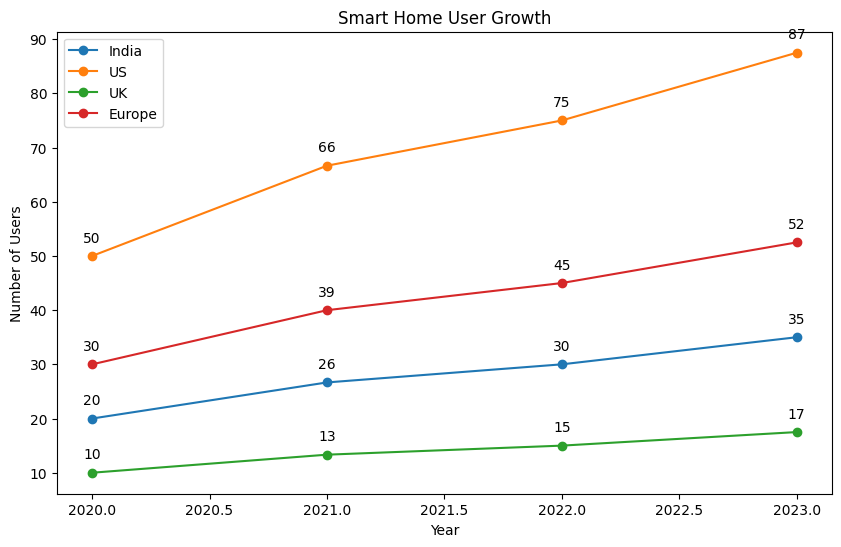

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
countries = ["India", "US", "UK", "Europe"]
users = [20, 50, 10, 30]

# Create figure
fig = plt.figure(figsize=(10, 6))

# Create axes
ax = fig.add_subplot(111)

# Plot data
for i in range(len(countries)):
    years = [2020, 2021, 2022, 2023]
    user_values = [users[i], users[i] * 1.333, users[i] * 1.5, users[i] * 1.75]
    ax.plot(years, user_values, marker="o", label=countries[i])
    for j in range(len(years)):
        ax.annotate(int(user_values[j]), (years[j], user_values[j]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add title
ax.set_title("Smart Home User Growth")

# Add labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Users")

# Add legend
ax.legend()

# Remove grid
ax.grid(False)

# Show figure
plt.show()

## ***Security Breaches and its Compensation Cost***

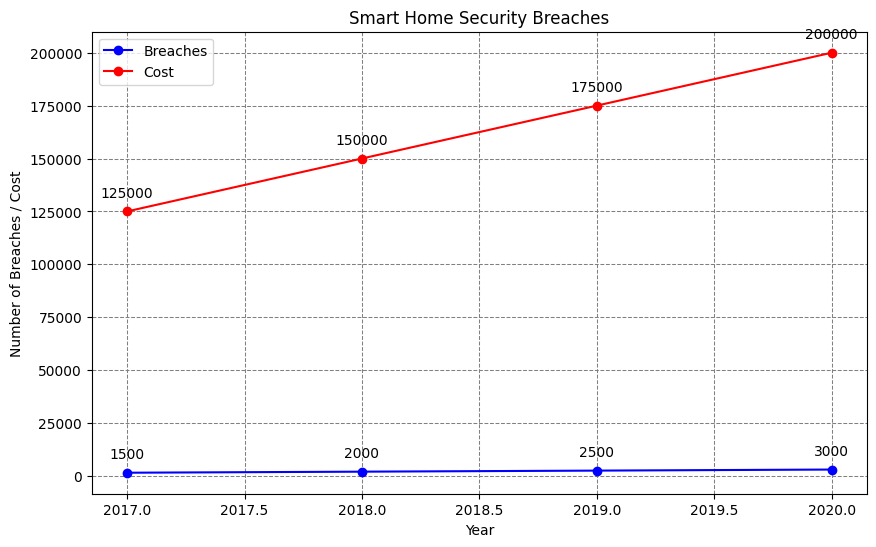

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
years = [2017, 2018, 2019, 2020]
breaches = [1500, 2000, 2500, 3000]
cost = [125000, 150000, 175000, 200000]

# Create figure
fig = plt.figure(figsize=(10, 6))

# Create axes
ax = fig.add_subplot(111)

# Plot data with markers and labels
ax.plot(years, breaches, marker="o", color="blue", label="Breaches")
for i in range(len(years)):
    ax.annotate(int(breaches[i]), (years[i], breaches[i]), textcoords="offset points", xytext=(0, 10), ha='center')

ax.plot(years, cost, marker="o", color="red", label="Cost")
for i in range(len(years)):
    ax.annotate(int(cost[i]), (years[i], cost[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add title
ax.set_title("Smart Home Security Breaches")

# Add labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of Breaches / Cost")

# Add legend
ax.legend()

# Increase readability
ax.grid(which="major", linewidth=0.75, color="gray", linestyle="--")

# Show figure
plt.show()

## ***Justification for Using AES Encryption and its Comparision with RSA Encryption Algorithm.***

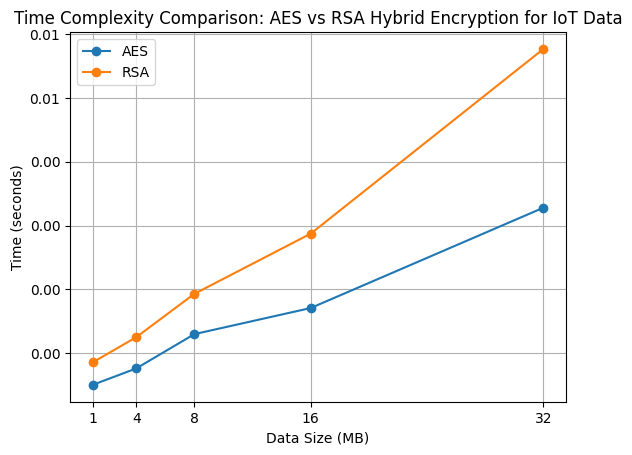

In [ ]:
import time
import random
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.backends import default_backend
from cryptography.fernet import Fernet


def generate_key():
    return Fernet.generate_key()


def generate_iot_data(data_size_mb):
    data_size = data_size_mb * 1024 * 10   # Convert megabytes to bytes
    data = bytearray(data_size)
    random.seed(time.time())
    random.shuffle(data)
    return bytes(data)  # Convert the bytearray to bytes


def aes_time_complexity(data_size_mb):
    data = generate_iot_data(data_size_mb)
    fernet = Fernet(generate_key())

    try:
        # Encrypt the data using Fernet
        start_time = time.time()
        ciphertext = fernet.encrypt(data)
        elapsed_time = time.time() - start_time
        return elapsed_time
    except Exception as e:
        print(f"Error during AES encryption: {e}")
        return None


def rsa_hybrid_encrypt(data, public_key):
    try:
        symmetric_key = generate_key()
        fernet = Fernet(symmetric_key)

        # Encrypt the data using the symmetric key (AES)
        ciphertext = fernet.encrypt(data)

        # Encrypt the symmetric key using RSA with OAEP padding
        encrypted_key = public_key.encrypt(
            symmetric_key,
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )

        return encrypted_key, ciphertext
    except Exception as e:
        print(f"Error during RSA encryption: {e}")
        return None, None


def rsa_time_complexity(data_size_mb, public_key):
    data = generate_iot_data(data_size_mb)

    try:
        # Encrypt the data using RSA hybrid encryption
        start_time = time.time()
        encrypted_key, ciphertext = rsa_hybrid_encrypt(data, public_key)
        elapsed_time = time.time() - start_time
        return elapsed_time
    except Exception as e:
        print(f"Error during RSA hybrid encryption: {e}")
        return None


def plot_computation_time():
    data_sizes_mb = [1, 4, 8, 16, 32]  # Vary data sizes in megabytes for AES and RSA

    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()

    aes_times = [aes_time_complexity(data_size_mb) for data_size_mb in data_sizes_mb]
    rsa_times = [rsa_time_complexity(data_size_mb, public_key) for data_size_mb in data_sizes_mb]

    aes_times = [time for time in aes_times if time is not None]  # Remove None values
    rsa_times = [time for time in rsa_times if time is not None]  # Remove None values

    plt.plot(data_sizes_mb, aes_times, label='AES', marker='o')
    plt.plot(data_sizes_mb, rsa_times, label='RSA', marker='o')
    plt.xlabel('Data Size (MB)')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.title('Time Complexity Comparison: AES vs RSA Hybrid Encryption for IoT Data')
    plt.grid(True)
    plt.xticks(data_sizes_mb)

    # Format y-axis ticks to display time in seconds with two decimal places
    plt.gca().yaxis.set_major_formatter('{:.2f}'.format)

    plt.show()


# Generating the graph to show the time complexity comparison between AES and RSA
plot_computation_time()


## ***Gas Cost for Result Verification Smart Contract(RVC) and Result Receiving Smart Contract(RRC)***

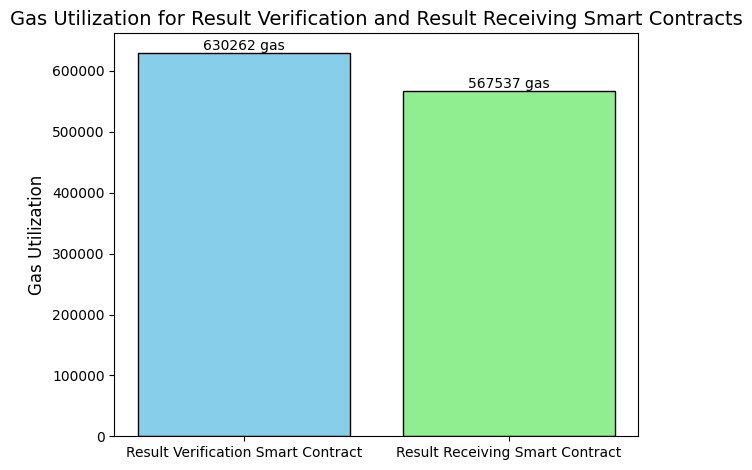

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Result Verification Smart Contract', 'Result Receiving Smart Contract']
gas_utilization = [630262, 567537]

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the vertical bars
ax.bar(categories, gas_utilization, color=['skyblue', 'lightgreen'], edgecolor='black')

# Add data labels to the bars
for i, gas in enumerate(gas_utilization):
    ax.text(i, gas, f'{gas} gas', ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_ylabel('Gas Utilization', fontsize=12)
ax.set_title('Gas Utilization for Result Verification and Result Receiving Smart Contracts', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## ***Checking Compatibility of Our System with different EVM Chains***

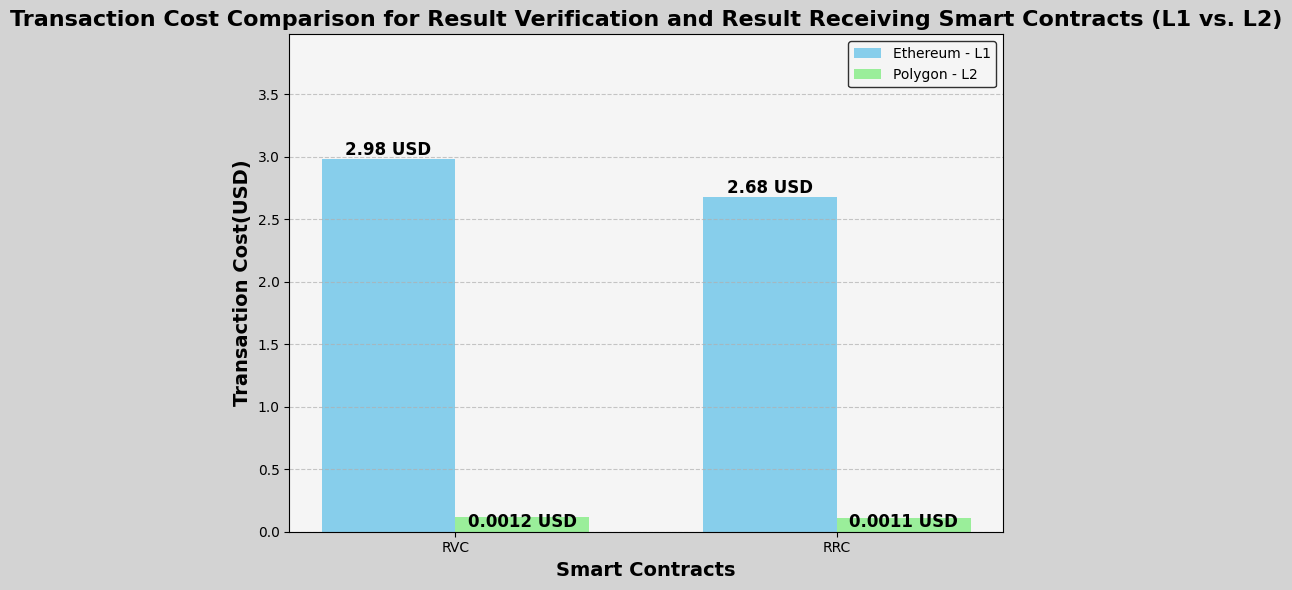

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['RVC', 'RRC']
gas_L1 = [2.98, 2.68]
gas_L2_actual = [0.12, 0.11]  # Actual L2 gas values
gas_L2_display = [0.0012, 0.0011]  # Values for display

# Create figure and axis objects with adjusted figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.35

# Position of bars on the x-axis
bar_positions_L1 = [0, 1]
bar_positions_L2 = [bar + bar_width for bar in bar_positions_L1]

# Plot the gas prices for L1 and L2 using bar graphs
ax.bar(bar_positions_L1, gas_L1, width=bar_width, color='skyblue', label='Ethereum - L1')
ax.bar(bar_positions_L2, gas_L2_actual, width=bar_width, color='lightgreen', label='Polygon - L2', alpha=0.9)  # Increase alpha value

# Add data labels on top of each bar for L1 and L2
for x, gas in zip(bar_positions_L1, gas_L1):
    ax.text(x, gas, f'{gas:.2f} USD', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
for x, gas in zip(bar_positions_L2, gas_L2_display):
    ax.text(x, gas + 0.001, f'{gas:.4f} USD', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title with enhanced styling
ax.set_xlabel('Smart Contracts', fontsize=14, fontweight='bold', color='black')
ax.set_ylabel('Transaction Cost(USD)', fontsize=14, fontweight='bold', color='black')
ax.set_title('Transaction Cost Comparison for Result Verification and Result Receiving Smart Contracts (L1 vs. L2)', fontsize=16, fontweight='bold', color='black')

# Add x-axis ticks and labels
ax.set_xticks([bar + bar_width / 2 for bar in bar_positions_L1])
ax.set_xticklabels(categories)

# Remove y-axis scaling
ax.set_yscale('linear')  # 'linear' scale shows values without scaling

# Increase y-axis limit for better visibility of L2 bars
ax.set_ylim(0, max(gas_L1) + 1)  # Adjust the y-axis limit for better visibility

# Add a legend with custom colors and shadow
ax.legend(edgecolor='black', facecolor='whitesmoke', fancybox=True)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha= 0.7)

# Show the plot with custom background color
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

# Save the plot to a file for future use
plt.savefig('gas_price_comparison_bar.png')

# Show the plot
plt.tight_layout()
plt.show()